#**16/07/2022**

#**CLASSIFICATION BY LDA, QDA AND SVM**

In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [143]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


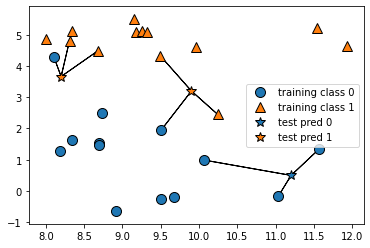

In [144]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

Text(0, 0.5, 'Feature 1')

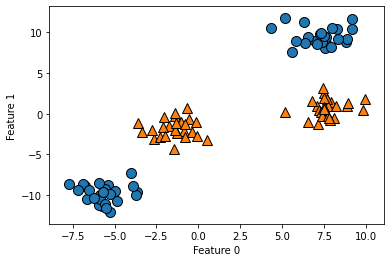

In [145]:
import mglearn
from sklearn.datasets import make_blobs
x, y=make_blobs(centers=4, random_state=8)
y=y%2
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

##**SVM**

###**LINEAR SVM**

In [146]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'Feature 1')

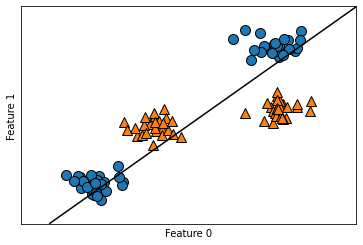

In [147]:
mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

###**NON-LINEAR SVM**

In [148]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

x_d, y_d=make_moons(n_samples=100, noise=0.15, random_state=42)
poly_svm=make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10000, random_state=2))
poly_svm.fit(x_d, y_d)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, max_iter=10000, random_state=2))])

##**GAUSSIAN RADIAL BASIS FUNCTION**

##**BREAST CANCER DATA ANALYSIS**

###**DATA PREPROCESSING**

In [149]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [150]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [151]:
x=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

In [152]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [153]:
corr=x.corr()
corr.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [154]:
x1=x.drop(['mean perimeter', 'mean area', 'worst perimeter', 'worst area'], axis=1)
x.shape

(569, 30)

In [155]:
x1.shape

(569, 26)

In [156]:
x1.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [157]:
from sklearn.preprocessing import StandardScaler
scaler=sklearn.preprocessing.StandardScaler()
x1_z=scaler.fit_transform(x1)
print(pd.DataFrame(x1_z).head())

         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.568466  3.283515  2.652874  2.532475  2.217515   
1  1.829821 -0.353632 -0.826962 -0.487072 -0.023846  0.548144  0.001392   
2  1.579888  0.456187  0.942210  1.052926  1.363478  2.037231  0.939685   
3 -0.768909  0.253732  3.283553  3.402909  1.915897  1.451707  2.867383   
4  1.750297 -1.151816  0.280372  0.539340  1.371011  1.428493 -0.009560   

         7         8         9   ...        16        17        18        19  \
0  2.255747  2.489734 -0.565265  ...  1.148757  0.907083  1.886690 -1.359293   
1 -0.868652  0.499255 -0.876244  ... -0.805450 -0.099444  1.805927 -0.369203   
2 -0.398008  1.228676 -0.780083  ...  0.237036  0.293559  1.511870 -0.023974   
3  4.910919  0.326373 -0.110409  ...  4.732680  2.047511 -0.281464  0.133984   
4 -0.562450  1.270543 -0.790244  ... -0.361092  0.499328  1.298575 -1.466770   

         20        21        22        23        24        25  
0  1

In [158]:
# same function as above cell
from scipy.stats import zscore
x1_z=x1.apply(zscore)
print(pd.DataFrame(x1_z).head())

   mean radius  mean texture  mean smoothness  mean compactness  \
0     1.097064     -2.073335         1.568466          3.283515   
1     1.829821     -0.353632        -0.826962         -0.487072   
2     1.579888      0.456187         0.942210          1.052926   
3    -0.768909      0.253732         3.283553          3.402909   
4     1.750297     -1.151816         0.280372          0.539340   

   mean concavity  mean concave points  mean symmetry  mean fractal dimension  \
0        2.652874             2.532475       2.217515                2.255747   
1       -0.023846             0.548144       0.001392               -0.868652   
2        1.363478             2.037231       0.939685               -0.398008   
3        1.915897             1.451707       2.867383                4.910919   
4        1.371011             1.428493      -0.009560               -0.562450   

   radius error  texture error  ...  symmetry error  fractal dimension error  \
0      2.489734      -0.565265

###**LINEAR SVC**

In [159]:
x_train, x_test, y_train, y_test=train_test_split(x1, y, test_size=0.3, random_state=1)

In [160]:
lsvc=make_pipeline(StandardScaler(), LinearSVC(C=100, random_state=42))
#lsvc=SVC(kernel='linear', C=100)
lsvc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=100, random_state=42))])

In [161]:
y_pred_svc=lsvc.predict(x_test)
y_pred_svc

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [162]:
print(lsvc.score(x_train, y_train))
print(lsvc.score(x_test, y_test))

0.9824120603015075
0.9532163742690059


###**NON-LINEAR SVC**

In [163]:
#poly_svc=make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=10, max_iter=10000, random_state=42))
from sklearn.svm import SVC
poly_svc=make_pipeline(StandardScaler(), SVC(kernel='poly', C=10, max_iter=10000, random_state=42))
poly_svc.fit(x_train, y_train)
y_pred_svc_poly=poly_svc.predict(x_test)
y_pred_svc_poly

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [164]:
print(poly_svc.score(x_train, y_train))
print(poly_svc.score(x_test, y_test))

0.9748743718592965
0.9532163742690059


###**EVALUATION METRICS**

####**CONFUSION MATRIX**

[[ 60   3]
 [  5 103]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


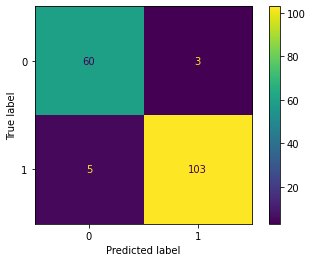

In [165]:
from sklearn import metrics
lsvc_cm=metrics.confusion_matrix(y_test, lsvc.predict(x_test))
metrics.plot_confusion_matrix(lsvc, x_test, y_test)
print(lsvc_cm)

[[ 56   7]
 [  1 107]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


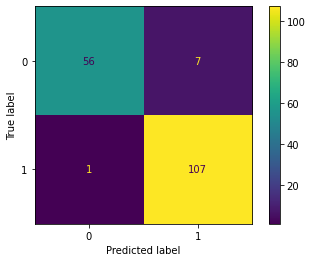

In [166]:
from sklearn import metrics
poly_svc_cm=metrics.confusion_matrix(y_test, poly_svc.predict(x_test))
metrics.plot_confusion_matrix(poly_svc, x_test, y_test)
print(poly_svc_cm)

####**PRECISION-RECALL**

In [167]:
from sklearn.metrics import precision_score, recall_score
print(lsvc_cm[1, 1]/(lsvc_cm[0, 1]+lsvc_cm[1, 1]))
print(precision_score(y_test, lsvc.predict(x_test)))
print(lsvc_cm[1, 1]/(lsvc_cm[1, 0]+lsvc_cm[1, 1]))
print(recall_score(y_test, lsvc.predict(x_test)))

0.9716981132075472
0.9716981132075472
0.9537037037037037
0.9537037037037037


In [168]:
print(poly_svc_cm[1, 1]/(poly_svc_cm[0, 1]+poly_svc_cm[1, 1]))
print(precision_score(y_test, poly_svc.predict(x_test)))
print(poly_svc_cm[1, 1]/(poly_svc_cm[1, 0]+poly_svc_cm[1, 1]))
print(recall_score(y_test, poly_svc.predict(x_test)))

0.9385964912280702
0.9385964912280702
0.9907407407407407
0.9907407407407407


####**PRECISION-RECALL CURVE**

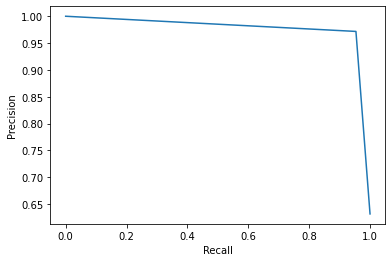

In [169]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_test, lsvc.predict(x_test))
plt.plot(recalls, precisions, label='Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision') 
plt.show()

####**F1-SCORE**

In [170]:
from sklearn.metrics import f1_score
print(lsvc_cm[1, 1]/(lsvc_cm[1, 1]+(lsvc_cm[1, 0]+lsvc_cm[0, 1])/2))
print(f1_score(y_test, lsvc.predict(x_test)))
print(poly_svc_cm[1, 1]/(poly_svc_cm[1, 1]+(poly_svc_cm[1, 0]+poly_svc_cm[0, 1])/2))
print(f1_score(y_test, poly_svc.predict(x_test)))

0.9626168224299065
0.9626168224299064
0.963963963963964
0.9639639639639639


####**ROC CURVE**

Text(0, 0.5, 'True Positive Rate')

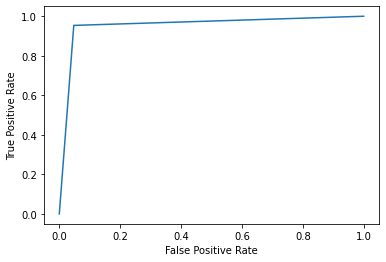

In [171]:
from sklearn.metrics import roc_auc_score
roc_lsvc=roc_auc_score(y_test, lsvc.predict(x_test))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, lsvc.predict(x_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

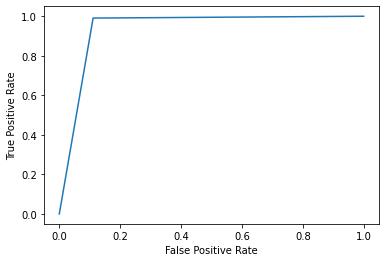

In [172]:
roc_poly_svc=roc_auc_score(y_test, poly_svc.predict(x_test))
fpr, tpr, thresholds=roc_curve(y_test, poly_svc.predict(x_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##**LINEAR DISCRIMINATORY ANALYSIS**

In [173]:
data=pd.read_csv('https://tinyurl.com/Smarket16072022')
data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1250 non-null   int64  
 1   Year        1250 non-null   int64  
 2   Lag1        1250 non-null   float64
 3   Lag2        1250 non-null   float64
 4   Lag3        1250 non-null   float64
 5   Lag4        1250 non-null   float64
 6   Lag5        1250 non-null   float64
 7   Volume      1250 non-null   float64
 8   Today       1250 non-null   float64
 9   Direction   1250 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 97.8+ KB


In [175]:
x=data.drop(['Unnamed: 0', 'Year', 'Direction'], axis=1)
y=data['Direction']

In [176]:
data.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [177]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda=lda.fit(x_train, y_train)
lda.priors_

array([0.47771429, 0.52228571])

In [179]:
lda.means_

array([[ 1.76531100e-02,  1.85215311e-02, -2.75406699e-02,
         3.60334928e-02, -8.68421053e-04,  1.47064675e+00,
        -8.56126794e-01],
       [-6.62975930e-02, -6.05361050e-02,  3.06564551e-02,
        -1.80962801e-02, -4.63391685e-02,  1.48403133e+00,
         8.09700219e-01]])

In [180]:
lda.coef_

array([[-5.78394316e-02, -2.66942838e-04,  9.84954831e-02,
        -9.38254095e-03,  5.03701511e-02,  8.47286679e-02,
         2.64097851e+00]])

In [181]:
y_pred=lda.predict(x_test)
y_pred

array(['Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'U

In [182]:
np.unique(y_pred, return_counts=True)

(array(['Down', 'Up'], dtype='<U4'), array([173, 202]))

###**EVALUATION METRICS**

In [183]:
metrics.confusion_matrix(y_pred, y_test)

array([[173,   0],
       [ 11, 191]])

In [184]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Down      1.000     0.940     0.969       184
          Up      0.946     1.000     0.972       191

    accuracy                          0.971       375
   macro avg      0.973     0.970     0.971       375
weighted avg      0.972     0.971     0.971       375



##**QUADRATIC DISCRIMINANT ANALYSIS**

In [185]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda=qda.fit(x_train, y_train)
print(qda.priors_)

[0.47771429 0.52228571]


In [186]:
qda.means_

array([[ 1.76531100e-02,  1.85215311e-02, -2.75406699e-02,
         3.60334928e-02, -8.68421053e-04,  1.47064675e+00,
        -8.56126794e-01],
       [-6.62975930e-02, -6.05361050e-02,  3.06564551e-02,
        -1.80962801e-02, -4.63391685e-02,  1.48403133e+00,
         8.09700219e-01]])

In [187]:
y_pred=qda.predict(x_test)
y_pred

array(['Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 

In [188]:
np.unique(y_pred, return_counts=True)

(array(['Down', 'Up'], dtype=object), array([175, 200]))

###**EVALUATION METRICS**

In [189]:
metrics.confusion_matrix(y_pred, y_test)

array([[168,   7],
       [ 16, 184]])

In [190]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Down      0.960     0.913     0.936       184
          Up      0.920     0.963     0.941       191

    accuracy                          0.939       375
   macro avg      0.940     0.938     0.939       375
weighted avg      0.940     0.939     0.939       375

